# Title: Ensemble Learning

<b>Implement Random Forest Classifier model to predict the safety of the car.</b> 

Dataset link: https://www.kaggle.com/datasets/elikplim/car-evaluation-data-set 

In [1]:
import numpy as np
import pandas as pd
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
from sklearn import  metrics, model_selection, preprocessing
from sklearn.ensemble import  RandomForestClassifier
from sklearn.tree import export_graphviz
import graphviz # ---> !pip install graphviz

In [2]:
data = pd.read_csv('datasets/car_evaluation.csv',names=['buying','maint','doors','lug_boot','safety','class'])

In [3]:
data.head()

,buying,maint,doors,lug_boot,safety,class
vhigh,vhigh,2,2,small,low,unacc
vhigh,vhigh,2,2,small,med,unacc
vhigh,vhigh,2,2,small,high,unacc
vhigh,vhigh,2,2,med,low,unacc
vhigh,vhigh,2,2,med,med,unacc


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1728 entries, vhigh to low
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   lug_boot  1728 non-null   object
 4   safety    1728 non-null   object
 5   class     1728 non-null   object
dtypes: object(6)
memory usage: 94.5+ KB


In [5]:
#Identify the target variable
data['class'],class_names = pd.factorize(data['class'])

In [6]:
print(class_names)
print(data['class'].unique())

Index(['unacc', 'acc', 'vgood', 'good'], dtype='object')
[0 1 2 3]


In [7]:
#Identify the predictor variables and encode any string variables to equivalent integer codes

data['buying'],_ = pd.factorize(data['buying'])
data['maint'],_ = pd.factorize(data['maint'])
data['doors'],_ = pd.factorize(data['doors'])
data['lug_boot'],_ = pd.factorize(data['lug_boot'])
data['safety'],_ = pd.factorize(data['safety'])
data.head()

,buying,maint,doors,lug_boot,safety,class
vhigh,0,0,0,0,0,0
vhigh,0,0,0,0,1,0
vhigh,0,0,0,0,2,0
vhigh,0,0,0,1,0,0
vhigh,0,0,0,1,1,0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1728 entries, vhigh to low
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   buying    1728 non-null   int64
 1   maint     1728 non-null   int64
 2   doors     1728 non-null   int64
 3   lug_boot  1728 non-null   int64
 4   safety    1728 non-null   int64
 5   class     1728 non-null   int64
dtypes: int64(6)
memory usage: 94.5+ KB


In [9]:
#Select the predictor feature and select the target variable

X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [10]:
# split data randomly into 70% training and 30% test
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=0)

In [11]:
# we can achieve the above two tasks using the following codes
# Bagging: using all features
model = RandomForestClassifier(random_state=1)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [12]:
# use the model to make predictions with the test data
y_pred = model.predict(X_test)

In [13]:
# how did our model perform?
count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

Misclassified samples: 127
Accuracy: 0.76


In [14]:
# create the classifier with n_estimators = 100

clf = RandomForestClassifier(n_estimators=100, random_state=0)

In [15]:
# fit the model to the training set

clf.fit(X_train, y_train)

feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

safety      0.348225
doors       0.317458
buying      0.122890
maint       0.113277
lug_boot    0.098150
dtype: float64

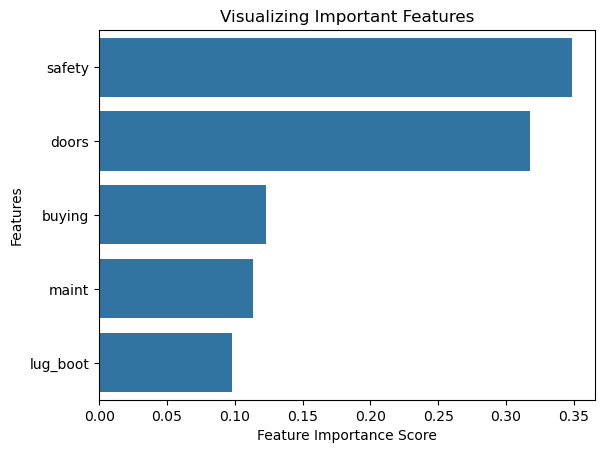

In [16]:
# Creating a seaborn bar plot
import seaborn as sns
sns.barplot(x=feature_scores, y=feature_scores.index)
# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
# Add title to the graph
plt.title("Visualizing Important Features")
# Visualize the graph
plt.show()

In [17]:
# Find the most important feature
feature_importances = clf.feature_importances_
best_feature_index = np.argmax(feature_importances)
best_feature_name = X_train.columns[best_feature_index]

In [18]:
#Print the name of the best feature
print(f"The best feature is: {best_feature_name}")

The best feature is: safety


In [19]:
# Create a decision tree using the best feature
best_feature_data = X_train.iloc[:, best_feature_index].values
tree_classifier = RandomForestClassifier(n_estimators=1, random_state=0)  # Create a single tree
tree_classifier.fit(best_feature_data.reshape(-1, 1), y_train)  # Reshape the data for a single feature

RandomForestClassifier(n_estimators=1, random_state=0)

In [20]:
# Visualize the decision tree
dot_data = export_graphviz(tree_classifier.estimators_[0], out_file=None,
                           feature_names=[best_feature_name], class_names=class_names,
                           filled=True, rounded=True, special_characters=True)

graph = graphviz.Source(dot_data)
graph.render("best_feature_tree")  # Save the tree to a file
graph.view("best_feature_tree")  # Open the tree in a viewer

'best_feature_tree.pdf'